In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
root=r"C:\Users\STEVE\Desktop\papers\current papers\fuel consumption paper"
df_corr=pd.read_csv(os.path.join(root, 'corridor.csv'))
df_Aero_link=pd.read_csv(os.path.join(root, 'link_Aero.csv'))
df_Mob_link=pd.read_csv(os.path.join(root, 'link_mob.csv'))
df_Mob_histo=pd.read_csv(os.path.join(root, 'Mob_histo.csv'))

In [91]:
lin_regressor = linear_model.LinearRegression() 
poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(df_corr['PR'].reshape(-1,1))
lr=lin_regressor.fit(X_transform[1:,1:],df_corr.Mob[1:])
r_sqr=lr.score(X_transform[1:,1:],df_corr.Mob[1:])
print(r_sqr)
#create data to draw the fitted line
pr=np.arange(.18,1.02,.01).reshape(-1,1)
x_transform=poly.fit_transform(pr.reshape(-1,1))
NLtrend=lr.predict(x_transform[:,1:])*100
pr=pr*100

0.994623011813904


C:\Users\STEVE\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


In [47]:
def autolabel(rects,c, shift, fontsize):
    for rect in rects:
        height = rect.get_height()
        sh=shift
        if (rect.get_y())<0: 
            height=-height
            sh=-1.2* shift
        if height!=0:
            ax.text(rect.get_x() + rect.get_width()/2., height+sh,
                    '%0.2f' % (height),
                    ha='center', va='bottom', color=c, size=fontsize)

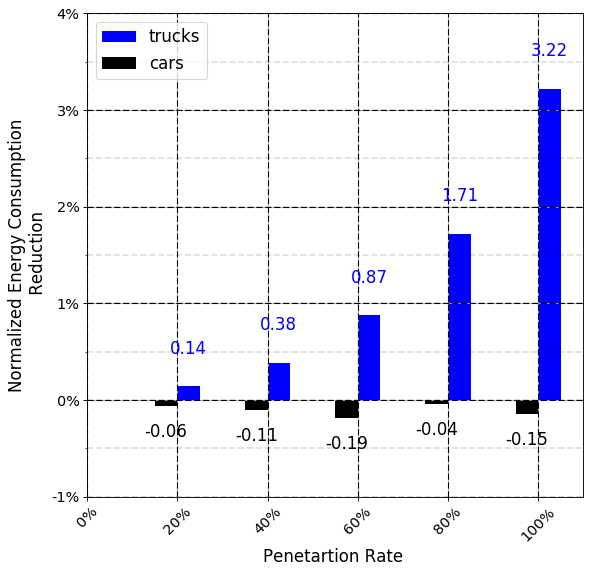

In [174]:
fig, ax=plt.subplots(1,1,figsize=(8,8), dpi=80)
w=5
rect1=ax.bar(df_corr.PR*100+w/2,df_corr.All*100,bottom= 0, color='blue',label='trucks',width=w )
rect2=ax.bar(df_corr.PR*100-w/2,df_corr.PC*100, bottom=0,color='k',label='cars', width=w )
ax.set_ylim(-1,4)
ax.set_xlim(0,110)
autolabel(rect1, 'blue', 0.3, 15)
autolabel(rect2,'k',0.3, 15)
ax.set_xlabel('Penetartion Rate ', size=15)
ax.set_ylabel('Normalized Energy Consumption\n Reduction', size=15)
plt.grid(True)
plt.legend(loc='upper left',prop={'size': 15})

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
mformat = mtick.FormatStrFormatter(fmt)
xmajorLocator = mtick.MultipleLocator(20)
yminorLocator = mtick.MultipleLocator(0.5)
ymajorLocator = mtick.MultipleLocator(1)


ax.set_xticklabels(df_corr.PR, rotation=0, fontsize=11)
ax.set_yticklabels([0,2,4], rotation=0, fontsize=11)


ax.xaxis.set_major_formatter(mformat)
ax.yaxis.set_major_formatter(mformat)

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_minor_locator(yminorLocator)

lw=1
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls='--', color='k', linewidth=lw)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls='--', color='k',linewidth=lw)
for ymin in ax.yaxis.get_minorticklocs():
    ax.axhline(y=ymin, ls='--', color='k',linewidth=0.2*lw)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)  
    tick.label.set_rotation(45)
    tick.label.set_color('k')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    tick.label.set_color('k')
                

#fig.savefig('myimage.png', format='png', dpi=1200)
plt.show()


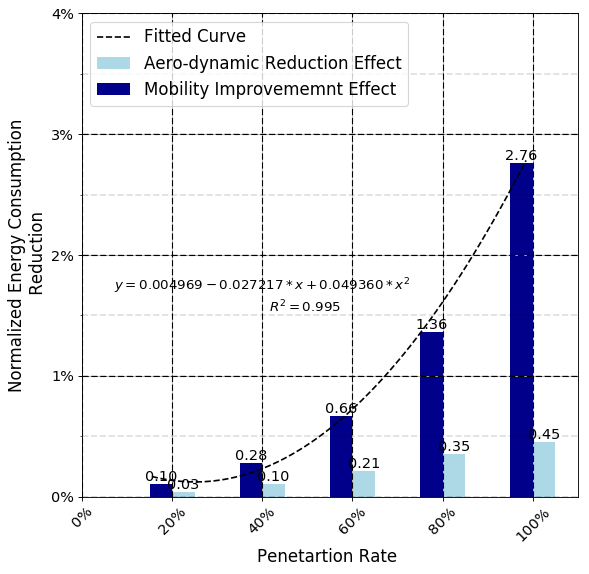

In [247]:
fig, ax=plt.subplots(1,1,figsize=(8,8), dpi=80)
w=5
rect1=ax.bar(df_corr.PR*100+w/2,df_corr.Aero*100,bottom= 0, color='lightblue',label='Aero-dynamic Reduction Effect',width=w )
rect2=ax.bar(df_corr.PR*100-w/2,df_corr.Mob*100, bottom=0, color='darkblue',label='Mobility Improvememnt Effect', width=w )
ax.plot(pr-w/2,NLtrend, ls='--',label='Fitted Curve',color='k' )
ax.set_ylim(0,4)
ax.set_xlim(0,110)
autolabel(rect1, 'k', 0, 13)
autolabel(rect2,'k', 0, 13)
ax.set_xlabel('Penetartion Rate ', size=15)
ax.set_ylabel('Normalized Energy Consumption\n Reduction', size=15)
plt.grid(True)
plt.legend(loc='upper left', prop={'size':15})


xmajorLocator = mtick.MultipleLocator(20)
yminorLocator = mtick.MultipleLocator(0.5)
ymajorLocator = mtick.MultipleLocator(1)


fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
mformat = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(mformat)
ax.yaxis.set_major_formatter(mformat)

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_minor_locator(yminorLocator)

lw=1
for xmaj in ax.xaxis.get_majorticklocs():
  ax.axvline(x=xmaj, ls='--', color='k', linewidth=lw)
for ymaj in ax.yaxis.get_majorticklocs():
  ax.axhline(y=ymaj, ls='--', color='k',linewidth=lw)
for ymin in ax.yaxis.get_minorticklocs():
  ax.axhline(y=ymin, ls='--', color='k',linewidth=0.2*lw)
ax.text(40, 1.5,s= r"""$y=%f %f*x + %f*x^2$
                    $R^2=%0.3f$"""%(a,b,c,r_sqr),
                    ha='center', va='bottom', size=12)

for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(13)  
        tick.label.set_rotation(45)
        tick.label.set_color('k')
for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(13)  
        tick.label.set_color('k')
        
#fig.savefig('myimage.png', format='png', dpi=1200)
plt.show()


In [159]:
lin_regressor2 = linear_model.LinearRegression(fit_intercept=False) 
X2=df_corr.PR.values.reshape(-1,1)
Y2=df_corr.AEP.values.reshape(-1,1)
lr2=lin_regressor2.fit(X2,Y2 )
pred=lr2.predict(X2)
r_sqr2=(lr2.score(X2,Y2))

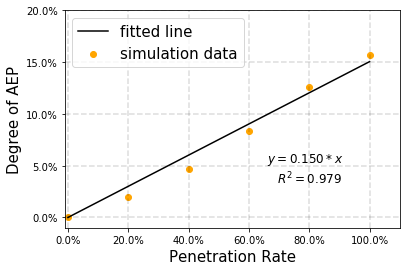

In [223]:
fig3, ax=plt.subplots(1,1)
ax.scatter(df_corr.PR*100, df_corr.AEP*100, color='orange', label='simulation data')
ax.plot(X2*100,pred*100, color='k', label='fitted line')

ax.set_xlim(-1,110)
ax.set_ylim(-1,20)

ax.set_xlabel('Penetration Rate', size=15)
ax.set_ylabel('Degree of AEP', size=15)
fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
mformat = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(mformat)
ax.yaxis.set_major_formatter(mformat)

plt.legend(loc='upper left', prop={'size':15})

for ticks in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    tick.label.set_color('k')
for ticks in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    tick.label.set_color('k')
    
xmajorLocator = mtick.MultipleLocator(20)
#yminorLocator = mtick.MultipleLocator(5)
ymajorLocator = mtick.MultipleLocator(5)

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
#ax.yaxis.set_minor_locator(yminorLocator)

for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls='--', color='k', linewidth=.2*lw)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls='--', color='k',linewidth=.2*lw)
    
ax.text(80, 3,s= r"""$y=%.3f*x$   
$R^2=%0.3f$"""%(lr2.coef_[0],r_sqr2),
                    ha='center', va='bottom', size=12)
#for ymin in ax.yaxis.get_minorticklocs():
#  ax.axhline(y=ymin, ls='--', color='k',linewidth=0.2*lw)

plt.show()

In [185]:
df_Aero_link=df_Aero_link.dropna()
lin_regressor3 = linear_model.LinearRegression() 
X3=df_Aero_link.AEP.values.reshape(-1,1)
Y3=df_Aero_link.NECR.values.reshape(-1,1)
lr3=lin_regressor3.fit(X3,Y3 )
pred3=lr3.predict(X3)
r_sqr3=(lr3.score(X3,Y3))

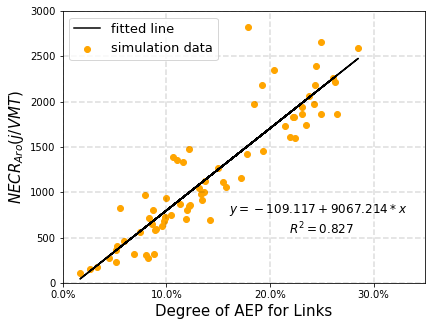

In [221]:
fig3, ax=plt.subplots(1,1, figsize=(6.5,5))
ax.scatter(df_Aero_link.AEP*100, df_Aero_link.NECR, color='orange', label='simulation data')
ax.plot(X3*100,pred3, color='k', label='fitted line')

ax.set_xlim(0,35)
ax.set_ylim(0,3000)

ax.set_xlabel('Degree of AEP for Links', size=15)
ax.set_ylabel('$NECR_{Aro}  (j/VMT)$', size=15)
fmt = '%.1f%%' 
mformat = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(mformat)


plt.legend(loc='upper left', prop={'size':13})


    
xmajorLocator = mtick.MultipleLocator(10)
ymajorLocator = mtick.MultipleLocator(500)

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)


for ticks in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_color('k')
for ticks in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_color('k')
    
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls='--', color='k', linewidth=.2*lw)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls='--', color='k',linewidth=.2*lw)
    
ax.text(25, 500,s= r"""$y=%.3f+%.3f*x$   
$R^2=%0.3f$"""%(lr3.intercept_,lr3.coef_[0],r_sqr3),
                    ha='center', va='bottom', size=12)


plt.show()

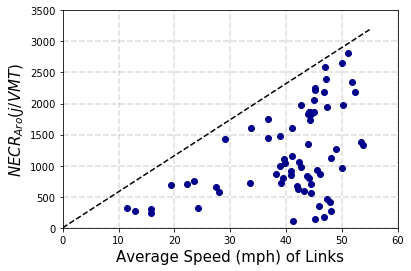

In [248]:
fig3, ax=plt.subplots(1,1)
ax.scatter( df_Aero_link.sp100,df_Aero_link.NECR, color='darkblue', label='simulation data')
ax.plot([0,55],[0,55*58], color='k', ls='--',label='fitted line')

ax.set_xlim(0,60)
ax.set_ylim(0,3500)

ax.set_xlabel('Average Speed (mph) of Links', size=15)
ax.set_ylabel('$NECR_{Aro}  (j/VMT)$', size=15)
fmt = '%.1f%%' 



#plt.legend(loc='upper left', prop={'size':13})


    
xmajorLocator = mtick.MultipleLocator(10)
ymajorLocator = mtick.MultipleLocator(500)

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
    
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls='--', color='k', linewidth=.2*lw)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls='--', color='k',linewidth=.2*lw)
    
for ticks in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_color('k')
    
for ticks in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_color('k')


plt.show()

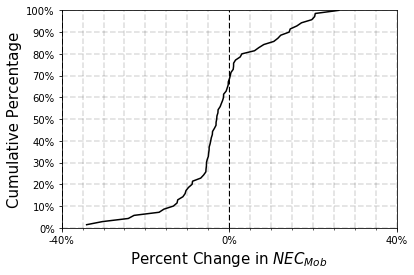

In [292]:
fig4, ax=plt.subplots(1,1)
ax.plot(-df_Mob_link.NEC_change*100,(1-df_Mob_link['rank'])*100, color='k')
#ax.plot([0,55],[0,55*58], color='k', ls='--',label='fitted line')

ax.set_xlim(-40,40)
ax.set_ylim(0,100)

ax.set_xlabel('Percent Change in $NEC_{Mob}$', size=15)
ax.set_ylabel('Cumulative Percentage', size=15)
fmt = '%.1f%%' 


fmt = '%.f%%' 
mformat = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(mformat)
ax.yaxis.set_major_formatter(mformat)

    
xmajorLocator = mtick.MultipleLocator(40)
xminorLocator = mtick.MultipleLocator(5)
ymajorLocator = mtick.MultipleLocator(10)

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.xaxis.set_minor_locator(xminorLocator)
    
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls='--', color='k', linewidth=lw)
for xmaj in ax.xaxis.get_minorticklocs():
    ax.axvline(x=xmaj, ls='--', color='k', linewidth=0.2*lw)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls='--', color='k',linewidth=0.2*lw)





for ticks in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_color('k')
for ticks in ax.xaxis.get_minor_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_color('k')
    
for ticks in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)
    tick.label.set_color('k')


plt.show()

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(8,8), dpi=80)
w=5
rect1=ax.bar(df_corr.PR*100+w/2,df_corr.All*100,bottom= 0, color='blue',label='trucks',width=w )
rect2=ax.bar(df_corr.PR*100-w/2,df_corr.PC*100, bottom=0,color='k',label='cars', width=w )
ax.set_ylim(-1,4)
ax.set_xlim(0,110)
autolabel(rect1, 'blue', 0.3, 15)
autolabel(rect2,'k',0.3, 15)
ax.set_xlabel('Penetartion Rate ', size=15)
ax.set_ylabel('Normalized Energy Consumption\n Reduction', size=15)
plt.grid(True)
plt.legend(loc='upper left',prop={'size': 15})

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
mformat = mtick.FormatStrFormatter(fmt)
xmajorLocator = mtick.MultipleLocator(20)
yminorLocator = mtick.MultipleLocator(0.5)
ymajorLocator = mtick.MultipleLocator(1)


ax.set_xticklabels(df_corr.PR, rotation=0, fontsize=11)
ax.set_yticklabels([0,2,4], rotation=0, fontsize=11)


ax.xaxis.set_major_formatter(mformat)
ax.yaxis.set_major_formatter(mformat)

ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)
ax.yaxis.set_minor_locator(yminorLocator)

lw=1
for xmaj in ax.xaxis.get_majorticklocs():
    ax.axvline(x=xmaj, ls='--', color='k', linewidth=lw)
for ymaj in ax.yaxis.get_majorticklocs():
    ax.axhline(y=ymaj, ls='--', color='k',linewidth=lw)
for ymin in ax.yaxis.get_minorticklocs():
    ax.axhline(y=ymin, ls='--', color='k',linewidth=0.2*lw)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)  
    tick.label.set_rotation(45)
    tick.label.set_color('k')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    tick.label.set_color('k')
                

#fig.savefig('myimage.png', format='png', dpi=1200)
plt.show()
